<a href="https://colab.research.google.com/github/Auusi/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio Clustering - Clasificador zonas según el peligro

## Integrantes Ausili Julián, Vanadía Matías

### Cargamos los datos e importamos librerias a usar.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go
from itertools import combinations

In [5]:
ruta_de_archivos = '/content/drive/MyDrive/Crimenes.csv'
dataframe = pd.read_csv(ruta_de_archivos)
df = dataframe.copy ()

### Utilizamos la siguiente función para obtener el valor de clusters ideal para agrupar el dataframe.


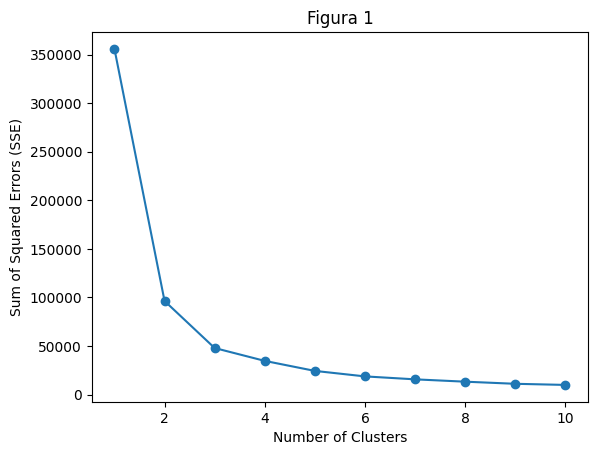

In [6]:
def find_optimal_clusters_kmeans(data, max_k):
    sse = []  # Sum of squared errors
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Figura 1")
    plt.show()

find_optimal_clusters_kmeans(df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']], 10)

### Iniciamos el proceso de clusterización en nuestro conjunto de datos, explorando las relaciones entre diferentes tipos de crímenes. Seleccionamos tres combinaciones significativas para examinar si el aumento en la incidencia de un crimen está correlacionado con otros. Estas combinaciones son:
###• Asesinatos vs Asaltos.
###• Asesinatos vs Violaciones.
###• Asaltos vs Violaciones.

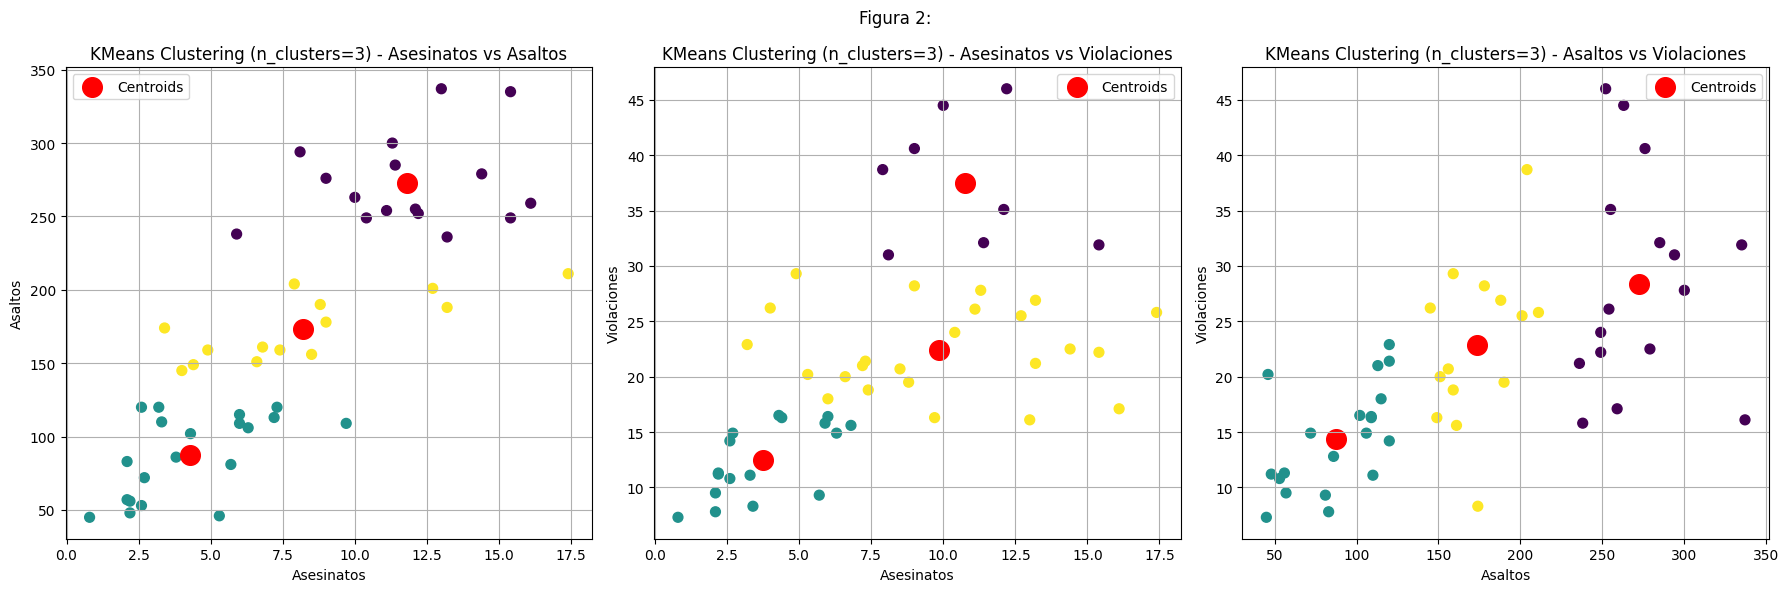

In [7]:
# Seleccionar las columnas relevantes
features = ['Asesinatos', 'Asaltos', 'Violaciones']

# Generar todas las combinaciones posibles de 2 columnas
column_combinations = list(combinations(features, 2))

# Calcular el número de subgráficas necesarias
num_plots = len(column_combinations)

# Configurar el diseño de la figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

# Iterar sobre las combinaciones y realizar clustering KMeans
for i, combination in enumerate(column_combinations):
    # Seleccionar las columnas para la combinación actual
    data = df[list(combination)].values

    # Aplicar KMeans con n_clusters=3
    kmeans = KMeans(n_clusters=3, n_init=10)
    clusters = kmeans.fit_predict(data)
    # Graficar los resultados en la subgráfica actual
    axes[i].scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label="Centroids")

    # Etiquetas y título
    axes[i].set_title(f'KMeans Clustering (n_clusters=3) - {combination[0]} vs {combination[1]}')
    axes[i].set_xlabel(combination[0])
    axes[i].set_ylabel(combination[1])
    axes[i].legend()
    axes[i].grid(True)

# Eliminar la última subgráfica vacía
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])


plt.suptitle('Figura 2:')
plt.tight_layout()

plt.show()

### Posteriormente, realizamos una agrupación según la Población vs. Crímenes, con el objetivo de discernir si el aumento de la población en los diversos estados guarda proporción con la incidencia de distintos tipos de crímenes.

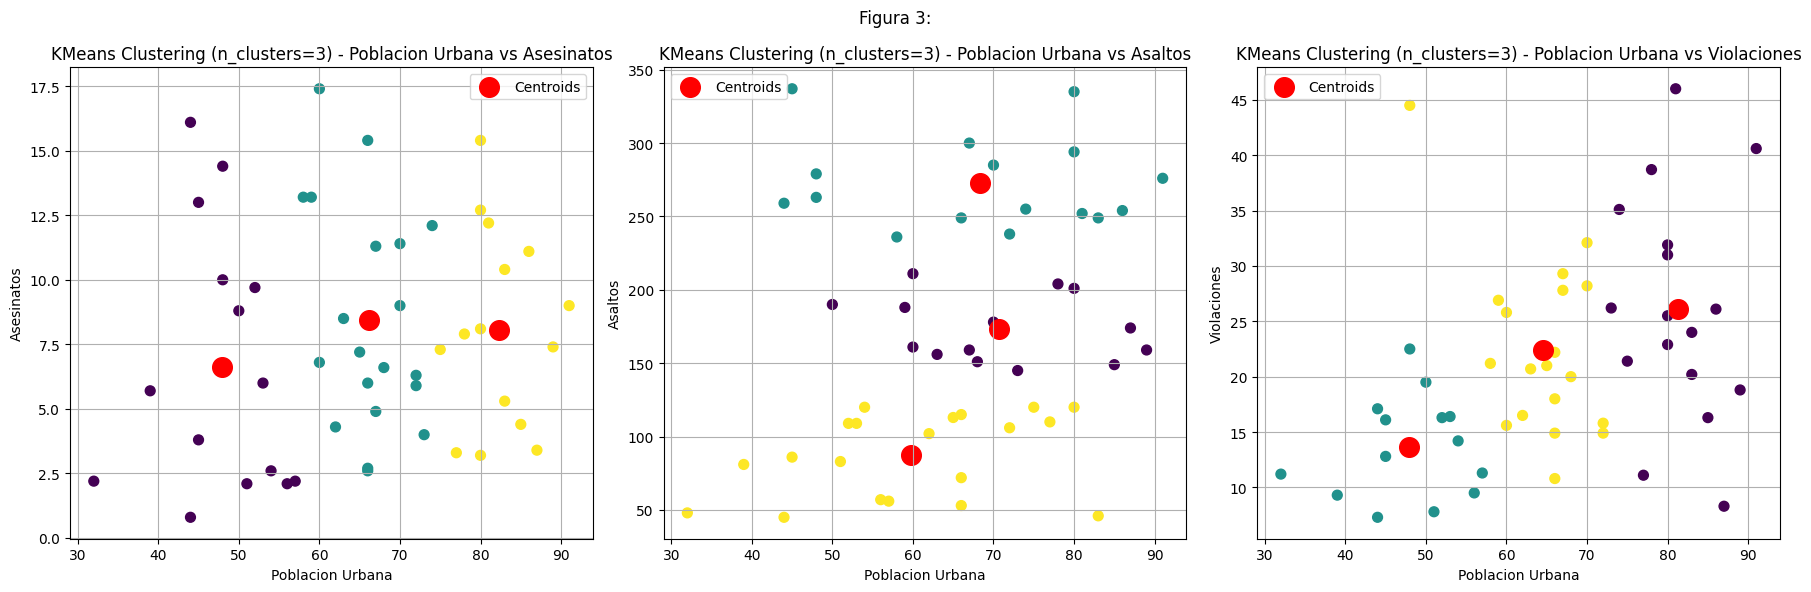

In [8]:
# Seleccionar las combinaciones deseadas
desired_combinations = [('Poblacion Urbana', 'Asesinatos'),
                        ('Poblacion Urbana', 'Asaltos'),
                        ('Poblacion Urbana', 'Violaciones')]

# Configurar el diseño de la figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterar sobre las combinaciones deseadas y realizar clustering KMeans
for i, combination in enumerate(desired_combinations):
    # Seleccionar las columnas para la combinación actual
    data = df[list(combination)].values

    # Aplicar KMeans con n_clusters=3
    kmeans = KMeans(n_clusters=3, n_init=10)
    clusters = kmeans.fit_predict(data)

    # Graficar los resultados en la subgráfica actual
    axes[i].scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label="Centroids")

    # Etiquetas y título
    axes[i].set_title(f'KMeans Clustering (n_clusters=3) - {combination[0]} vs {combination[1]}')
    axes[i].set_xlabel(combination[0])
    axes[i].set_ylabel(combination[1])
    axes[i].legend()
    axes[i].grid(True)

# Ajustes de diseño
plt.suptitle('Figura 3:')
plt.tight_layout()
plt.show()

### Finalmente, integramos todas las variables relevantes, es decir, la Población Urbana y los tres tipos de crímenes. Procedimos a realizar la clusterización en tres grupos distintos. En el gráfico 3D, se puede apreciar el Cluster 2 representado en rojo, indicando alta peligrosidad, el amarillo que denota peligrosidad media, y el verde que señala baja peligrosidad. Este enfoque integral nos proporciona una visión holística de la relación entre la población urbana y la naturaleza de los crímenes, permitiéndonos identificar patrones y tendencias significativas en la peligrosidad percibida en los estados analizados.

In [9]:
data = df[['Asaltos', 'Asesinatos', 'Violaciones', 'Poblacion Urbana']].values

# Aplicar KMeans con n_clusters=3
random_seed = 6  # Puedes cambiar este número si lo deseas
kmeans = KMeans(n_clusters=3, random_state=random_seed, n_init=10)
clusters = kmeans.fit_predict(data)

# Obtener las asignaciones de cluster para cada estado
cluster_assignments = kmeans.predict(data)

# Agregar la información de cluster al DataFrame original
df['Cluster'] = cluster_assignments

# Mapear colores a los clusters
cluster_colors = {0: 'red', 1: 'orange', 2: 'green'}  # Invertir el mapeo para verde y rojo (porque el grafico me los invertia)
df['Color'] = df['Cluster'].map(cluster_colors)

# Crear gráfico interactivo 3D con plotly express
fig = px.scatter_3d(df, x='Asaltos', y='Asesinatos', z='Violaciones', color='Color',
                    size_max=30, opacity=0.7, symbol='Cluster', labels={'Color': 'Cluster'},
                    hover_data={'Estado': True, 'Asaltos': True, 'Asesinatos': True, 'Violaciones': True, 'Poblacion Urbana': True, 'Cluster': False},
                    title='KMeans Clustering (n_clusters=3)',
                    template='plotly_dark',
                    color_discrete_map=cluster_colors,
                    color_discrete_sequence=list(cluster_colors.values()))

# Personalizar la apariencia del gráfico
fig.update_layout(scene=dict(
                    xaxis_title='Asaltos',
                    yaxis_title='Asesinatos',
                    zaxis_title='Violaciones'))

# Mostrar el gráfico interactivo
fig.show()

### Calculamos y visualizamos la media de variables clave, como Asesinatos, Asaltos, Violaciones y Población Urbana, para cada cluster mediante un gráfico interactivo de barras con Plotly Express. Esta representación concisa destaca las diferencias medias entre los clusters en términos de crímenes y población urbana.

In [10]:
# Calcular la media para cada cluster
cluster_means = df.groupby('Cluster')[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']].mean().reset_index()

# Graficar la media de cada cluster con Plotly Express
fig = px.bar(cluster_means, x='Cluster', y=['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana'],
             labels={'value': 'Media', 'variable': 'Variables'},
             title='Media de Variables por Cluster',
             template='plotly_dark')

# Personalizar la apariencia del gráfico
fig.update_layout(barmode='group', xaxis_title='Clusters', yaxis_title='Media')

# Mostrar el gráfico interactivo
fig.show()

### A continuación, se presenta un mapa de Estados Unidos coloreado de acuerdo con el nivel de peligrosidad criminalística en cada región.

In [11]:
# Mapeo de nombres de estados a abreviaturas
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Crea el objeto Choropleth
fig = go.Figure(go.Choropleth(
    locations=df['Estado'].map(state_abbr),  # Abreviaturas de estados
    locationmode='USA-states',
    z=df['Cluster'],  # Valores para la asignación de colores
    text=df['Estado'],
    colorscale=[[0, 'lightyellow'], [0.5, 'peachpuff'], [1, 'lightpink']],  # Escala de colores
    colorbar_title='Peligrosidad'
))

# Personaliza el diseño del mapa
fig.update_layout(
    title_text='Mapa de Clusters por Peligrosidad',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='lightskyblue',
    ),
)

# Muestra el mapa
fig.show()

### Conclusión

####• Correlación entre Diferentes Tipos de Crímenes:
####Existe una fuerte correlación entre los diferentes tipos de crímenes. La figura 2 muestra claramente que los estados con mayores tasas de asaltos tienden a tener también mayores tasas de asesinatos y violaciones. Esta correlación sugiere patrones comunes en la distribución de diferentes tipos de crímenes a lo largo de los estados.
####• Relación entre la Cantidad de Población y la Tasa de Crimen:
####La cantidad de población no parece estar directamente correlacionada con la tasa de crimen en los estados. Se observa que, a pesar de las variaciones en la población urbana, los niveles de crimen (medidos por asaltos y asesinatos) no siguen una tendencia proporcional. Sin embargo, es interesante destacar que, en el caso de las violaciones, hay una correlación ligeramente más pronunciada. Estados con mayores poblaciones urbanas tienden a mostrar tasas de violaciones más altas. Esto sugiere que, para las violaciones, la población podría tener un impacto más significativo en comparación con otros tipos de crímenes. (Figura 3).
####• Análisis de Clusters:
####La figura 3D y las medias de cada cluster revelan que los estados han sido agrupados en tres categorías distintas de peligrosidad, identificadas por los colores amarillo, verde y rojo.
####Los estados en el cluster rojo muestran niveles más altos de crimen en comparación con los estados en los clusters verde y amarillo.
####La agrupación no parece depender únicamente de la cantidad de población, ya que estados con poblaciones similares pueden pertenecer a clusters diferentes.